In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/BI_DataProject

 2565541.csv   'Japan earthquakes 2001 - 2018.csv'      jpy1.csv
 database.csv  'Japan earthquakes 2001 - 2018.gsheet'   jpy.xlsx


In [ ]:
path = '/content/drive/My Drive/BI_DataProject'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (187 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702063 sha256=34c80ee04dd9363c486f3f27e1f2565602415fa1e67f9e2e94f94c2dc11cdd5a
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.5.0
    Uninstalling pyproj-2.5.0:
      Successfully uninstalled pyproj-2.5.0


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')
from mpl_toolkits.basemap import Basemap

In [ ]:
dataframe = pd.read_csv(path + '/database.csv')
dataframe.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
dataframe.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
dataframe = dataframe[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
dataframe.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(dataframe['Date'], dataframe['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [ ]:
timeStamp = pd.Series(timestamp)
dataframe['Timestamp'] = timeStamp.values

In [ ]:
final_data = dataframe.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.2460,145.6160,131.60,6.0,-1.57631e+08
1,1.8630,127.3520,80.00,5.8,-1.57466e+08
2,-20.5790,-173.9720,20.00,6.2,-1.57356e+08
3,-59.0760,-23.5570,15.00,5.8,-1.57094e+08
4,11.9380,126.4270,15.00,5.8,-1.57026e+08
...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,1.48291e+09
23408,38.3777,-118.8957,8.80,5.5,1.48292e+09
23409,36.9179,140.4262,10.00,5.9,1.48293e+09
23410,-9.0283,118.6639,79.00,6.3,1.48305e+09


Visualization

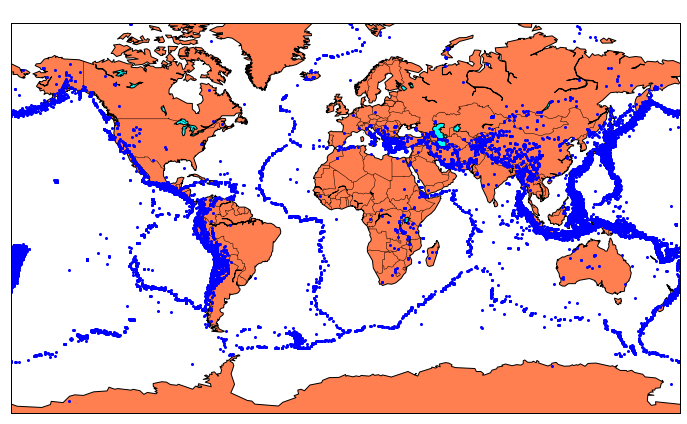

In [ ]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = dataframe["Longitude"].tolist()
latitudes = dataframe["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas",color = 'white')
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

Spitting Data



In [ ]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[  5.919 ,  40.798 ],
       [  5.841 ,  34.2448],
       [  6.058 ,  40.816 ],
       ...,
       [  6.331 ,  24.197 ],
       [  5.951 , 594.561 ],
       [  5.812 ,  37.    ]])

In [ ]:
X_test

,Timestamp,Latitude,Longitude
13121,8.38672e+08,24.602,122.2820
17921,1.15118e+09,-0.390,123.1950
3419,1.65667e+08,-23.022,-175.1120
20803,1.30621e+09,39.709,143.2470
15057,9.72071e+08,-4.623,-106.0440
...,...,...,...
10828,7.02013e+08,-49.872,-113.7440
22412,1.41309e+09,57.282,-33.2667
18333,1.17478e+09,-20.754,169.3540
11266,7.25493e+08,-6.087,113.0500


In [ ]:
reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8718589768124286

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

array([[  5.8888 ,  43.532  ],
       [  5.8232 ,  31.71656],
       [  6.0034 ,  39.3312 ],
       ...,
       [  6.3066 ,  23.9292 ],
       [  5.9138 , 592.151  ],
       [  5.7866 ,  38.9384 ]])

In [ ]:
best_fit.score(X_test, y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8748782808765546

Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Best: 0.800270 using {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.800270 (0.367757) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.400274 (0.439178) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.586976 (0.455709) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


Training & Test Data

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 18727 samples, validate on 4682 samples
Epoch 1/20
18727/18727 [==============================] - 2s 130us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 2/20
18727/18727 [==============================] - 2s 121us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 3/20
18727/18727 [==============================] - 2s 124us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 4/20
18727/18727 [==============================] - 2s 127us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 5/20
18727/18727 [==============================] - 2s 124us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 6/20
18727/18727 [==============================] - 2s 129us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 7/20
18727/18727 [==============================] - 2s 127us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - v

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4682/4682 [==============================] - 0s 18us/step
Evaluation result on Test Data : Loss = 0.5038455790406056, accuracy = 0.9241777017858995


In [ ]:
final_data

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.2460,145.6160,131.60,6.0,-1.57631e+08
1,1.8630,127.3520,80.00,5.8,-1.57466e+08
2,-20.5790,-173.9720,20.00,6.2,-1.57356e+08
3,-59.0760,-23.5570,15.00,5.8,-1.57094e+08
4,11.9380,126.4270,15.00,5.8,-1.57026e+08
...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,1.48291e+09
23408,38.3777,-118.8957,8.80,5.5,1.48292e+09
23409,36.9179,140.4262,10.00,5.9,1.48293e+09
23410,-9.0283,118.6639,79.00,6.3,1.48305e+09


In [ ]:
model.save('earthquake.csv')

In [ ]:
print(model)